In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
! pip install -q kaggle
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"zotako","key":"667b3064758d00736fd09b20e214a040"}'}

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list
!kaggle datasets download -d tsiaras/uk-road-safety-accidents-and-vehicles
! mkdir train
! unzip uk-road-safety-accidents-and-vehicles.zip -d train


ref                                                            title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
-------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
iamsouravbanerjee/world-population-dataset                     World Population Dataset                             17KB  2022-08-31 11:20:04           9326        277  1.0              
thedevastator/mcdonalds-ice-cream-machines-broken-timeseries   McDonalds Ice Cream Machines Breaking - Timeseries  404KB  2022-09-14 23:51:09            847         35  1.0              
pantanjali/unemployment-dataset                                Unemployment dataset                                 17KB  2022-09-08 08:26:10           2276         68  1.0              
evangower/premier-league-match-data                            Pr

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('train'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

train/Accident_Information.csv
train/Vehicle_Information.csv


In [ ]:
accidents_dataset=pd.read_csv("train/Accident_Information.csv")
accidents_dataset.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Accident_Index,1st_Road_Class,1st_Road_Number,2nd_Road_Class,2nd_Road_Number,Accident_Severity,Carriageway_Hazards,Date,Day_of_Week,Did_Police_Officer_Attend_Scene_of_Accident,...,Police_Force,Road_Surface_Conditions,Road_Type,Special_Conditions_at_Site,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Year,InScotland
0,200501BS00001,A,3218.0,NaN,0.0,Serious,None,2005-01-04,Tuesday,1.0,...,Metropolitan Police,Wet or damp,Single carriageway,None,30.0,17:42,Urban,Raining no high winds,2005,No
1,200501BS00002,B,450.0,C,0.0,Slight,None,2005-01-05,Wednesday,1.0,...,Metropolitan Police,Dry,Dual carriageway,None,30.0,17:36,Urban,Fine no high winds,2005,No
2,200501BS00003,C,0.0,NaN,0.0,Slight,None,2005-01-06,Thursday,1.0,...,Metropolitan Police,Dry,Single carriageway,None,30.0,00:15,Urban,Fine no high winds,2005,No
3,200501BS00004,A,3220.0,NaN,0.0,Slight,None,2005-01-07,Friday,1.0,...,Metropolitan Police,Dry,Single carriageway,None,30.0,10:35,Urban,Fine no high winds,2005,No
4,200501BS00005,Unclassified,0.0,NaN,0.0,Slight,None,2005-01-10,Monday,1.0,...,Metropolitan Police,Wet or damp,Single carriageway,None,30.0,21:13,Urban,Fine no high winds,2005,No


# **Finding no. of null values in the dataset**

In [ ]:
accidents_dataset.isna().sum(axis=0)

Accident_Index                                      0
1st_Road_Class                                      0
1st_Road_Number                                     2
2nd_Road_Class                                 844272
2nd_Road_Number                                 17593
Accident_Severity                                   0
Carriageway_Hazards                                 0
Date                                                0
Day_of_Week                                         0
Did_Police_Officer_Attend_Scene_of_Accident       278
Junction_Control                                    0
Junction_Detail                                     0
Latitude                                          174
Light_Conditions                                    0
Local_Authority_(District)                          0
Local_Authority_(Highway)                           0
Location_Easting_OSGR                             164
Location_Northing_OSGR                            164
Longitude                   

In [ ]:
accidents_dataset["Date"]=pd.to_datetime(accidents_dataset["Date"],format="%Y-%m-%d")

# **Convert hrs to a categorical data**

In [ ]:
accidents_dataset['Hour']=accidents_dataset['Time'].str[0:2]
accidents_dataset=accidents_dataset.dropna(subset=['Hour'])
accidents_dataset['Hour']=pd.to_numeric(accidents_dataset['Hour'])

In [ ]:
def converthrstocategory(hrs):
    if(hrs<12):
        return 'Morning'
    elif(hrs>=12 and hrs<17):
        return 'Afternoon'
    else:
        return 'Night'

In [ ]:
accidents_dataset['Hrs_category']=accidents_dataset['Hour'].apply(converthrstocategory)
accidents_dataset['Hrs_category']

0              Night
1              Night
2            Morning
3            Morning
4              Night
             ...    
2047251      Morning
2047252    Afternoon
2047253    Afternoon
2047254        Night
2047255    Afternoon
Name: Hrs_category, Length: 2047100, dtype: object

# **Proportion of null values in the dataframe**

In [ ]:
print(accidents_dataset.isna().sum(axis=0).sum()/len(accidents_dataset))

0.49540129939915


In [ ]:
import glob

import matplotlib.pyplot as plt
import seaborn as sns

# **No. of accidents decreased overtime (Monthly and Yearly plots to indicate) (3 plots)**

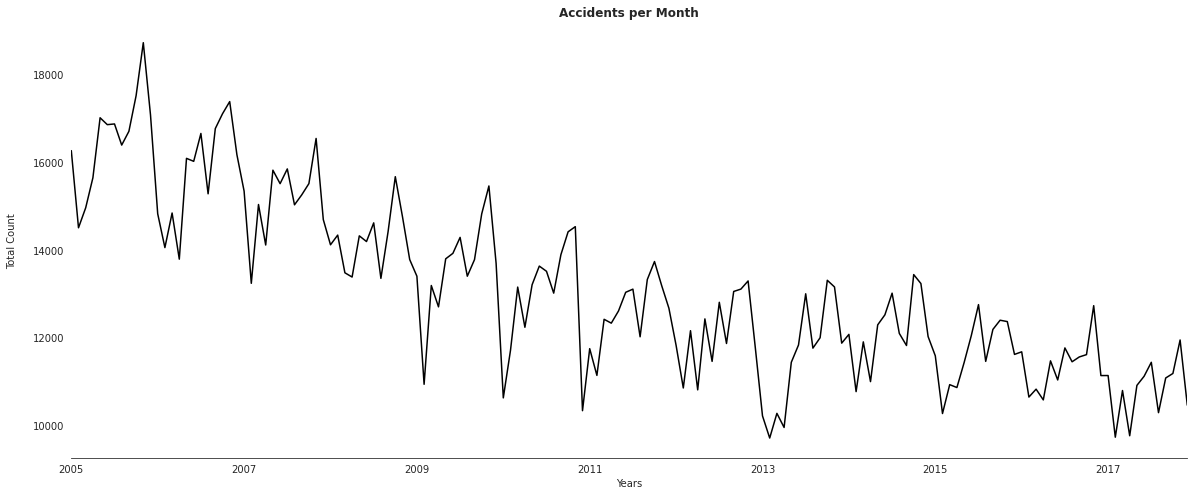

In [ ]:
sns.set_style('white')
fig, ax = plt.subplots(figsize=(20,8))
accidents_dataset.set_index('Date').resample('M').size().plot(label="Total Per Month",color="black",ax=ax)
ax.set_title('Accidents per Month', fontsize=12, fontweight='bold')
ax.set(ylabel='Total Count\n', xlabel='Years')
sns.despine(ax=ax, top=True, right=True, left=True, bottom=False);

[Text(0, 0.5, 'Total Count\n'), Text(0.5, 0, 'Years')]

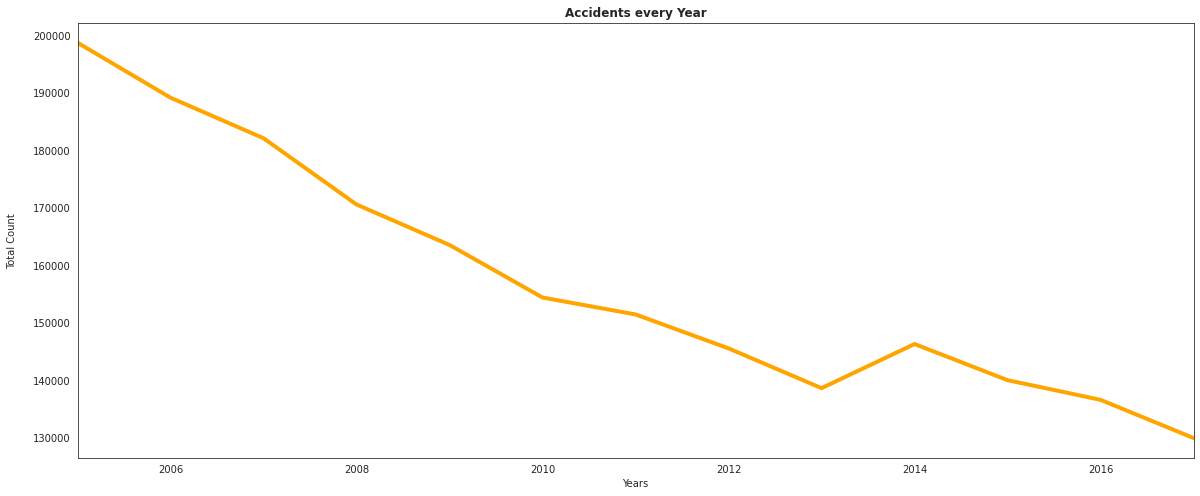

In [ ]:
sns.set_style('white')
fig, ax = plt.subplots(figsize=(20,8))
ax.set_title('Accidents every Year', fontsize=12, fontweight='bold')
accidents_dataset.set_index('Date').resample('Y').size().plot(label="Total Per Year",color="orange",linewidth="4",ax=ax)
ax.set(ylabel='Total Count\n', xlabel='Years')

[Text(0, 0.5, 'Total Counts'), Text(0.5, 0, 'Years')]

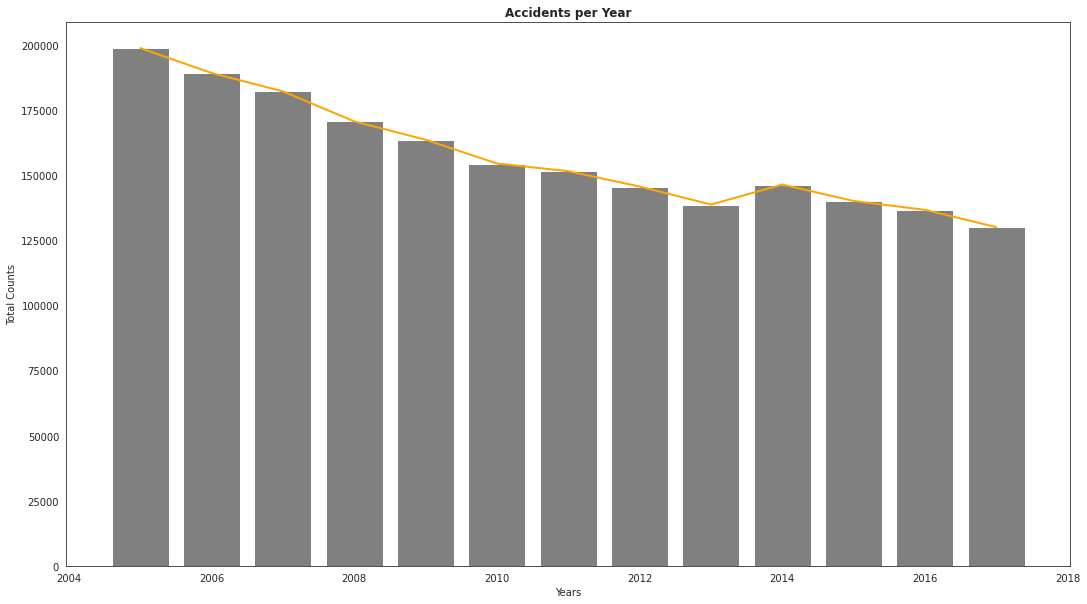

In [ ]:
sns.set_style('white')
fig,ax=plt.subplots(figsize=(18,10))
yearly_count = accidents_dataset['Date'].dt.year.value_counts().sort_index(ascending=False)
ax.bar(yearly_count.index, yearly_count.values, color='gray')
ax.plot(yearly_count, color='orange',linewidth="2")
ax.set_title('Accidents per Year', fontsize=12, fontweight='bold')
ax.set(ylabel='Total Counts',xlabel="Years")

# Number of accidents throughout the day

In [ ]:
accidents_dataset['Hrs_category'].to_frame()

,Hrs_category
0,Night
1,Night
2,Morning
3,Morning
4,Night
...,...
2047251,Morning
2047252,Afternoon
2047253,Afternoon
2047254,Night


In [ ]:
time_of_day = accidents_dataset['Hrs_category']

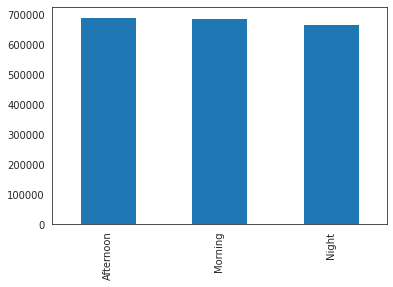

In [ ]:
plotMat = time_of_day.value_counts()
plotMat.to_frame()
plotMat.plot(kind = 'bar')

# Correlation analysis

In [ ]:
def histogram_intersection(a, b):
    v = np.minimum(a, b).sum().round(decimals=1)
    return v
accidents_dataset.corr(method=histogram_intersection)

,1st_Road_Number,2nd_Road_Number,Did_Police_Officer_Attend_Scene_of_Accident,Latitude,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Number_of_Casualties,Number_of_Vehicles,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Speed_limit,Year,Hour
1st_Road_Number,1.000000e+00,338463734.0,1740943.0,67218746.3,2.030755e+09,2.030755e+09,-2919163.1,2010725.0,2726114.0,14390.0,1238144.0,50922463.0,1.101127e+09,18678625.0
2nd_Road_Number,3.384637e+08,1.0,527697.0,20442010.0,7.566585e+08,7.566585e+08,-2983236.8,572434.0,805469.0,4889.0,578213.0,14782295.0,3.777579e+08,5584255.0
Did_Police_Officer_Attend_Scene_of_Accident,1.740943e+06,527697.0,1.0,2460703.0,2.460714e+06,2.460714e+06,-2898384.7,2100077.0,2346528.0,15012.0,409830.0,2460870.0,2.460929e+06,2423645.0
Latitude,6.721875e+07,20442010.0,2460703.0,1.0,1.075855e+08,1.075855e+08,-2886330.5,2754703.8,3753102.4,21288.0,1536243.0,74661375.5,1.075855e+08,27788255.0
Location_Easting_OSGR,2.030755e+09,756658539.0,2460714.0,107585472.5,1.000000e+00,5.295328e+11,-2886330.5,2754886.0,3753134.0,21288.0,1536248.0,79507370.0,4.115414e+09,27788313.0
Location_Northing_OSGR,2.030755e+09,756658539.0,2460714.0,107585472.5,5.295328e+11,1.000000e+00,-2886330.5,2754886.0,3753134.0,21288.0,1536248.0,79507370.0,4.115414e+09,27788313.0
Longitude,-2.919163e+06,-2983236.8,-2898384.7,-2886330.5,-2.886330e+06,-2.886330e+06,1.0,-2898354.8,-2890975.1,-3028061.1,-3011862.6,-2886297.6,-2.886330e+06,-2888454.7
Number_of_Casualties,2.010725e+06,572434.0,2100077.0,2754703.8,2.754886e+06,2.754886e+06,-2898354.8,1.0,2496122.0,14634.0,429598.0,2754853.0,2.755105e+06,2693745.0
Number_of_Vehicles,2.726114e+06,805469.0,2346528.0,3753102.4,3.753134e+06,3.753134e+06,-2890975.1,2496122.0,1.0,18016.0,565549.0,3753366.0,3.753433e+06,3689793.0
Pedestrian_Crossing-Human_Control,1.439000e+04,4889.0,15012.0,21288.0,2.128800e+04,2.128800e+04,-3028061.1,14634.0,18016.0,1.0,15339.0,21293.0,2.129300e+04,20945.0


In [ ]:
df = accidents_dataset

# Number of fatal accidents throughout the day

In [ ]:
accidents_dataset['Accident_Severity'].value_counts()['Fatal']/accidents_dataset['Accident_Severity'].value_counts().sum()

0.012880171950564213

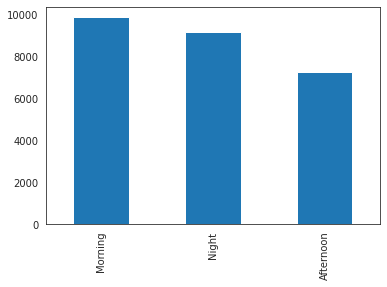

In [ ]:
df[(df.Accident_Severity == 'Fatal')]['Hrs_category'].value_counts().plot(kind = 'bar')

In [ ]:

vehicle_info = pd.read_csv("train/Vehicle_Information.csv",encoding='latin1')

# Age of drivers in accidents

In [ ]:
vehicle_info['Age_Band_of_Driver'].value_counts()

26 - 35                         450531
36 - 45                         435686
46 - 55                         348762
21 - 25                         238765
56 - 65                         206181
16 - 20                         175874
Data missing or out of range    171052
66 - 75                          91454
Over 75                          54236
11 - 15                           3655
6 - 10                             884
0 - 5                              125
Name: Age_Band_of_Driver, dtype: int64

# Weather Conditions vs no. of accidents

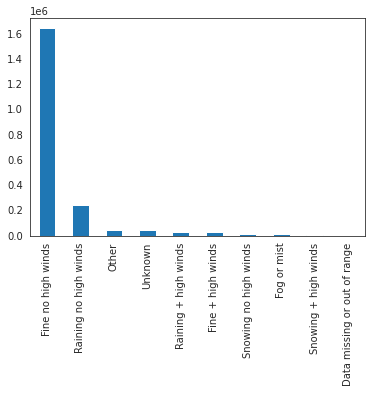

In [ ]:
accidents_dataset['Weather_Conditions'].value_counts().plot(kind = 'bar')

In [ ]:
accidents_dataset['Weather_Conditions'].value_counts()['Fine no high winds']/accidents_dataset['Weather_Conditions'].value_counts().sum()

0.8011230521225148

# **Plotting accident severity**

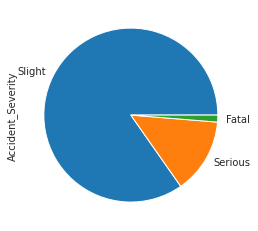

In [ ]:
accidents_dataset['Accident_Severity'].value_counts().plot(kind = 'pie')

# New Plots

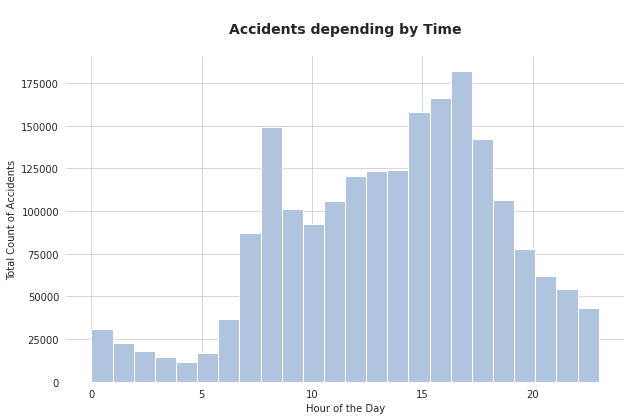

In [ ]:
sns.set_style('white')
fig, ax = plt.subplots(figsize=(10,6))

# plot
accidents_dataset.Hour.hist(bins=24, ax=ax, color='lightsteelblue')
ax.set_title('\nAccidents depending by Time\n', fontsize=14, fontweight='bold')
ax.set(xlabel='Hour of the Day', ylabel='Total Count of Accidents')

# remove all spines
sns.despine(top=True, right=True, left=True, bottom=True);

In [ ]:
def when_was_it(hour):
    if hour >= 5 and hour < 10:
        return "morning rush (5-10)"
    elif hour >= 10 and hour < 15:
        return "office hours (10-15)"
    elif hour >= 15 and hour < 19:
        return "afternoon rush (15-19)"
    elif hour >= 19 and hour < 23:
        return "evening (19-23)"
    else:
        return "night (23-5)"
accidents_dataset['Hrs_category']=accidents_dataset['Hour'].apply(when_was_it)
accidents_dataset['Hrs_category']

0          afternoon rush (15-19)
1          afternoon rush (15-19)
2                    night (23-5)
3            office hours (10-15)
4                 evening (19-23)
                    ...          
2047251      office hours (10-15)
2047252      office hours (10-15)
2047253      office hours (10-15)
2047254    afternoon rush (15-19)
2047255      office hours (10-15)
Name: Hrs_category, Length: 2047100, dtype: object

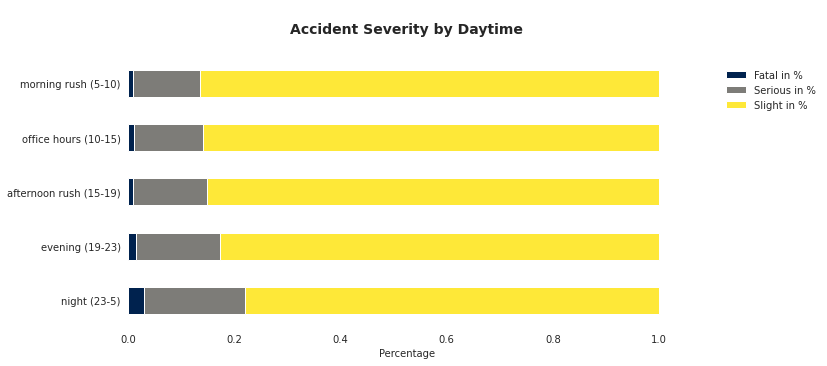

In [ ]:
order = ['night (23-5)', 'evening (19-23)', 'afternoon rush (15-19)', 'office hours (10-15)', 'morning rush (5-10)']
counts = accidents_dataset.groupby(['Hrs_category', 'Accident_Severity']).size()

counts = counts.rename_axis(['Hrs_category', 'Accident_Severity'])\
                                .unstack('Accident_Severity')\
                                .rename({1:'fatal', 2:'serious', 3:'slight'}, axis='columns')
counts['sum'] = counts.sum(axis=1)
counts = counts.join(counts.div(counts['sum'], axis=0), rsuffix=' in %')
counts_share = counts.drop(columns=['Fatal', 'Serious', 'Slight', 'sum', 'sum in %'], axis=1)
fig, ax = plt.subplots(figsize=(10, 5))

# plot
counts_share.reindex(order).plot(kind='barh', ax=ax, stacked=True, cmap='cividis')
ax.set_title('\nAccident Severity by Daytime\n', fontsize=14, fontweight='bold')
ax.set(xlabel='Percentage', ylabel='')
ax.legend(bbox_to_anchor=(1.25, 0.98), frameon=False)

# remove all spines
sns.despine(top=True, right=True, left=True, bottom=True);


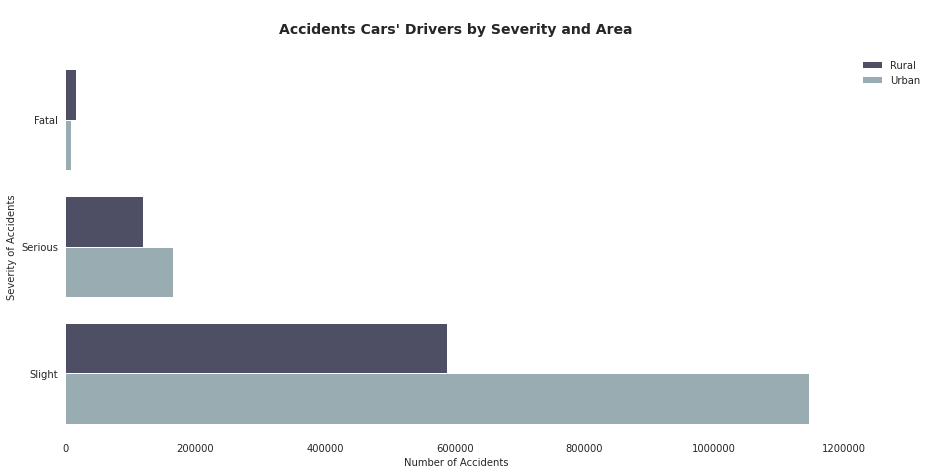

In [ ]:
fig, ax = plt.subplots(figsize=(14, 7))
drivers = accidents_dataset.groupby(['Accident_Severity', 'Urban_or_Rural_Area']).size().reset_index()
drivers.drop(drivers[(drivers['Urban_or_Rural_Area']=='Unallocated')].index,inplace=True)
drivers.columns = ['Accident_Severity', 'Urban_or_Rural_Area', 'Count']
sns.barplot(y='Accident_Severity', x='Count', hue='Urban_or_Rural_Area', data=drivers, palette='bone')
ax.ticklabel_format(style='plain',axis='x')
ax.set_title('\nAccidents Cars\' Drivers by Severity and Area\n', fontsize=14, fontweight='bold')
ax.set(xlabel='Number of Accidents', ylabel='Severity of Accidents')
ax.legend(bbox_to_anchor=(1.1, 1.), borderaxespad=0., frameon=False)

sns.despine(top=True, right=True, left=True, bottom=True);

In [ ]:
#severity and weather
#Time of day
import numpy as np 
import matplotlib.pyplot as plt 
  
X = ['Urban','Rural']
Urban = accidents_dataset.loc[accidents_dataset['Urban_or_Rural_Area'] == 'Urban'].loc[accidents_dataset['Accident_Severity'] == 'Slight']
Rural = accidents_dataset.loc[accidents_dataset['Urban_or_Rural_Area'] == 'Rural'].loc[accidents_dataset['Accident_Severity'] == 'Fatal']
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, Urban, 0.4, label = 'Urban')
plt.bar(X_axis + 0.2, Rural, 0.4, label = 'Rural')
  
plt.xticks(X_axis, X)
plt.xlabel("Urban Or Rural")
plt.ylabel("Number of Accidents")
# plt.title("Number of Students in each group")
# plt.legend()
# plt.show()